<a href="https://colab.research.google.com/github/Precious3ita/Top-spotify-listening/blob/main/Assessment_on_visualization_and_data_exploration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
furniture_data = pd.read_csv('/content/online_furniture_retailer.csv')
furniture_data.head()

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


In [17]:
furniture_data.dtypes

,0
product_category,object
product_subcategory,object
brand,object
delivery_status,object
assembly_service_requested,bool
payment_method,object
order_id,int64
customer_id,int64
product_price,float64
shipping_cost,float64


In [18]:
#saving a copy in a variable
furniture_data_copy = furniture_data.copy()

In [19]:
furniture_data.product_subcategory.unique()

array(['Patio Set', 'Sofa', 'Bar Stool', 'China Cabinet', 'Buffet',
       'Mattress', 'Dining Table', 'Dining Chair', 'Side Table',
       'Wardrobe', 'Coffee Table', 'Lounge Chair', 'Desk',
       'Pantry Cabinet', 'Umbrella', 'Armchair', 'Bar Cart',
       'Kitchen Island', 'Chest of Drawers', 'Dresser', 'Outdoor Table',
       'Bookshelf', 'Garden Chair', 'Nightstand', 'Computer Table',
       'TV Stand', 'Office Chair', 'Filing Cabinet', 'Ottoman',
       'Bed Frame', 'Kitchen Cabinet'], dtype=object)

In [20]:
furniture_data.product_category.value_counts()

,count
product_category,
Outdoor,338
Living Room,333
Office,324
Kitchen,322
Bedroom,318
Dining Room,303


In [21]:
furniture_data.product_category.index

RangeIndex(start=0, stop=1938, step=1)

In [22]:
category_counts = furniture_data['product_category'].value_counts().reset_index()
category_counts.columns = ['product_category', 'count']

fig = px.bar(category_counts, x='product_category', y='count', color='product_category')

fig.update_layout(
    title='Distribution Base On Highest Demands of Furnitures In The Product Category ',
    xaxis_title='Product Category',
    yaxis_title='Count'
)
fig.show()

In [23]:
product_category = furniture_data.groupby('product_category')["product_price"].sum().sort_values(ascending=False)
product_category

,product_price
product_category,
Bedroom,476318.38
Living Room,439234.14
Kitchen,438378.72
Outdoor,329883.38
Dining Room,304141.79
Office,252235.98


In [24]:
fig = px.bar(product_category, x=product_category.index, y=product_category.values, title="Most Expensive Furnitures In The Product Category",
             color=product_category.index)
fig

In [25]:
# Correlation between numerical features
furniture_data.corr(numeric_only=True)

,assembly_service_requested,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
assembly_service_requested,1.000000,0.019794,0.008984,0.009089,0.010116,0.750947,0.102612,-0.053427,0.042685
order_id,0.019794,1.000000,0.020766,0.015435,-0.025683,0.008576,0.013983,-0.033441,0.035997
customer_id,0.008984,0.020766,1.000000,0.028750,0.002395,0.007671,0.029159,0.018156,0.014676
product_price,0.009089,0.015435,0.028750,1.000000,0.044991,0.019370,0.989521,0.012339,0.033141
shipping_cost,0.010116,-0.025683,0.002395,0.044991,1.000000,0.026502,0.119041,-0.009137,-0.038922
assembly_cost,0.750947,0.008576,0.007671,0.019370,0.026502,1.000000,0.144745,-0.055306,0.054382
total_amount,0.102612,0.013983,0.029159,0.989521,0.119041,0.144745,1.000000,0.004500,0.036039
delivery_window_days,-0.053427,-0.033441,0.018156,0.012339,-0.009137,-0.055306,0.004500,1.000000,-0.003581
customer_rating,0.042685,0.035997,0.014676,0.033141,-0.038922,0.054382,0.036039,-0.003581,1.000000


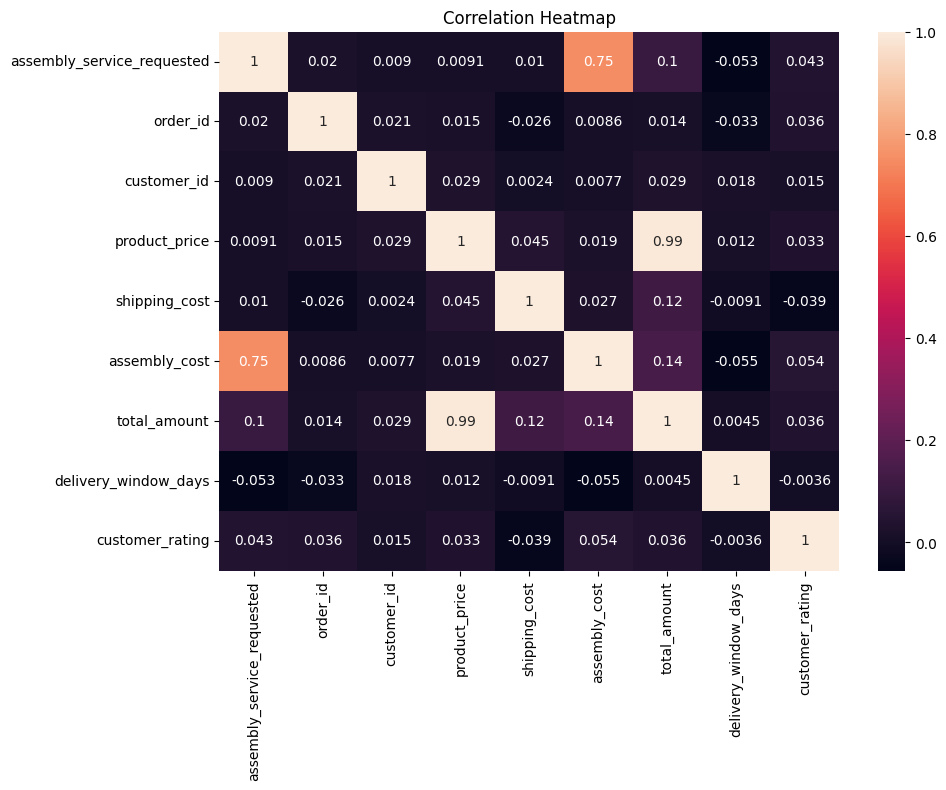

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(furniture_data.corr(numeric_only=True), annot=True,)
plt.title('Correlation Heatmap')
plt.show()

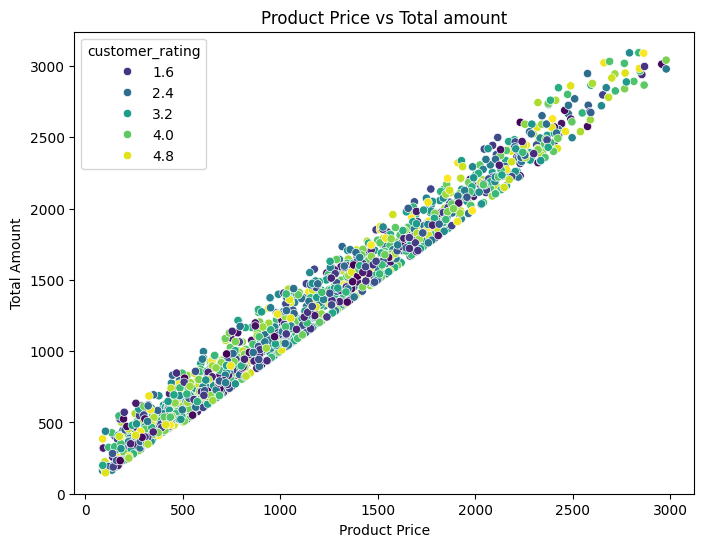

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=furniture_data, x='product_price', y='total_amount', hue= 'customer_rating', palette='viridis')
plt.title('Product Price vs Total amount')
plt.xlabel('Product Price')
plt.ylabel('Total Amount')
plt.title('Product Price vs Total amount')
plt.show()

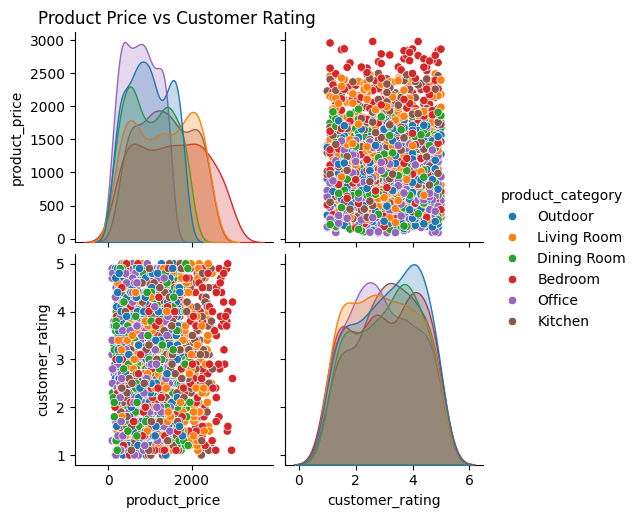

In [28]:
img = sns.pairplot(furniture_data, vars= ['product_price', 'customer_rating'], hue='product_category', diag_kind='kde')
img.fig.suptitle('Product Price vs Customer Rating', y=1.02, x=0.5, ha='right')

plt.show()